# Perceptron
 - input(X) -> weight(W) -> sum(linear) -> activation function -> output
 - ex) $y = sign(\sum x_i*w_i + b) = sign(X^TW + b)$ 이때 sign은 활성화 함수이다.
 - 위에 식의 b의 의미는 bias이다. bias의 필요성은 다음과 같다.
 - NN을 학습을 할때 weight 업데이트를 해주어야 된다. (max_iter로 학습의 횟수(업데이트의 횟수)를 지정)
 - weight의 업데이트 시에 weight의 업데이트만으로는 해결 할 수 없는 문제가 있어 bias를 더하여 bias도 업데이트 하면서 학습이 이루어진다.
 - 업데이트의 과정은 아래와 같다.
 - $ W = W + n(y - y')X$      ( n : learning rate, y' : output)

# Activation Function
 - 활성화 함수는 퍼셉트론의 출력에 의미를 부여해 준다.(decision boundary에 영향을 줌)
 - 일반적으로 비선형(Non - linear)함수이다.
 
## 대표적인 activation function
 1) Sign funtion   
    - if sign(t) > 0 => +1  not -1
    - decision boundary의 거리를 신경쓰지 않는다. (1,-1두개만 출력,hard decision)
    
 2) Tanh funtion ($tanh(x) = \frac{e^x - e^-x} {e^x + e^-x}$)
    - 값이 작을수록 -1, 커질수록 1에 가깝게 출력
    - 모든 실수 입력값에 대해 출력이 정의
    - output이 실수값으로 나옴(-1 ~ 1)
    - 입력 값이 0에 가까울 수록 출력이 빠르게 변함
    - 모든 점에서 미분 가능
<img src="https://www.mathworks.com/help/examples/matlab/win64/GraphHyperbolicTangentFunctionExample_01.png" width="50%">
  
  3) sigmoid function ($sigmoid(x) = \frac{1}{1 + e^-x}$)
    - 값이 작아질 수록 0, 커질수록 1에 수렴
    - output으로 확률을 표현 할 수 있음
    - 모든 점 미분가능
    - 입력값이 0에 가까울 수록 출력이 빠르게 변함
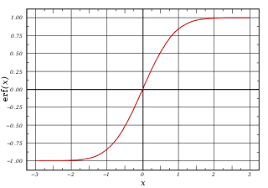
    
  4) softmax function ($softmax(x)_i = \frac{e^(x_i)}{\sum_j e^(x_j)}$)
    - 각 입력의 지수함수를 정규화
    - 각 출력은 0~1 사이의 값을 가짐
    - 모든 출력의 합은 1
    - 여러 경우의 수 중 한가지에 속할 확률을 표현
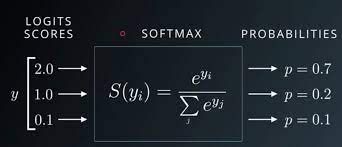
    
  5) ReLU(rectified linear unit) function ($ReLU(x) = max(0,x)$)
    - 입력값이 0 보다 작은 값들은 0으로 강제
    - 가장 많이 사용됨
    - 미분값이 일정 (0 or 1)하므로 학습이 잘됨
    - 단순한 구현으로 빠른 연산이 가능
    - vanishing gradient를 상당부분 해결
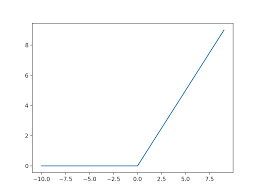

# Loss Function
  - 최적화 이론에서 최소화 하고자 하는 함수
  - 알고리즘 학습 중 아직 얼마나 못 하는지 표현
  - 보통 미분가능한 함수를 사용
  - 목적 함수, 비용 함수 등으로 불림
  - $\mu' = arg\min_\mu L(x,y,\mu)$    (L: 손실함수, $\mu$:학습된 모든 파라미터 벡터)
  
## 대표적인 loss function
  1) MSE ($E = \sum_i (y_i - \tilde y_i)$) (실제 - 예측) 
     - 기본적인 손실함수로 오차가 커질수록 손실 함수가 빠르게 증가함
     - regression에서 많이 쓰임
  
  2) MAE ($E = \sum_i (\lvert y_i - \tilde y_i\lvert)$)
     - 오차가 커져도 손실함수가 일정하게 증가함
     - outlier에 강건(robust)
     - 통계적으로 중간 값과 연관이 있음
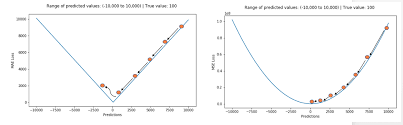     
(오른쪽 mae, 왼쪽 mse)

  3) CEE(cross entropy error) ($E = - \sum_i y_ilog\tilde y_i$)
     - $y_i $: 학습데이터 정답의 i번째 요소(원- 핫 인코딩)
     - 원 - 핫 인코딩으로 인해 정답인 클래스에 대한 오차만 계산
     - 맞추면 0 틀릴수록 오차가 무한히 증가 한다.
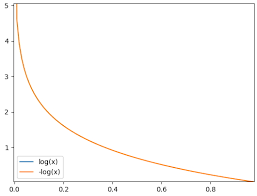


# Optimization 
   - object function을 minimize하는 것이 목표
   - NN에서는 object function = loss function이다.
   - 손실 함수가 최소가 되게하는 파라미터값을 구하는 것이 NN에서의 최적화이다.
   - 최적화를 실행 하여 나온 결과 값이 global에서의 최적화인지 local에서의 최적화인지 알아내기 힘들다.
<img src ='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSujWqDZoBx3GM9OgEb0sVINzkSpkQTbKMBZQ&usqp=CAU' width = 50%>


## 대표적 최적화 방법
  1) brute - force(무차별 대입법) 
     - 가능한 모든 수를 대입해 보는 방법
     - 가장 단순한 방법으로 함수를 알 수있다.
     - 문제점 
        - 최적값이 존재하는 범위를 알아야 된다.
        - 최적값을 정확히 찾기 위해 촘촘히 조사해야된다.
        - 계산 복잡도가 매우 높다.(정확히 하기 위해 촘촘히 조사하려면 많은 시도를 해야됨.)
  2) Gradient Descent(경사 하강법)
     - 가장 유명한 최적화 방법
     - 미분 가능할때 사용 할 수있다.(기울기를 구해야 됨)
     - learning rate에 따라 x 값을 조정하면서 f(x) 의 기울기를 구한다.
     - 기울기의 감소량이 줄어드는 지점을 찾는다.
     - 이때 학습량을 너무크게하면 아래의 그림과 같은 문제점이 발생한다.
     - 또한 비볼록(non -convex) 함수의 경우 local에 빠질 수 있다.
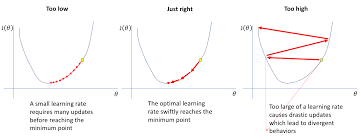



## Gradient Descent local minimize 해결법 및 알고리즘들
   1) momentum 
     - 관성의 개념을 이용하여 local minimize지역에 도달시 그곳을 빠져나오는 방법
     - 이동벡터를 이용해 이전 기울기에 영향을 받는 알고리즘
     - local minimize와 잡음에 대처할수 있다.
     - 이동벡터를 추가하여 사용하므로 경사하강법 대비 2배의 메모리를 사용
   
   2) AdaGrad (Adaptive gradient)
     - 적응적 기울기: 변수별로 learning rate를 달라지게 조절하는 알고리즘
     - 현재까지의 기울기의 합을 구하여 다른 변수들의 반비례하게 학습율을 조정
     - 기울기가 커서 학습이 많이 된 변수는 학습율을 감소시켜 다른 변수들이 잘학습되도록 함
     - 학습이 많을 때 기울기의 합이 너무 커져 합습이 이루어지지 않는다.
   
   3) RMSProp
     - adagrad의 문제점을 개선한 방법으로 기울기의 합 대신 지수평균을 사용
    
   4) Adam (Adaptive moment estimation)
     - 현재 DNN에서 가장 많이 사용된다.
     - RMSprop 와 Momentum의 장점을 결합한 알고리즘
     